<a href="https://colab.research.google.com/github/danieltodaDS/ML-Fundamentals/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [90]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import metrics as mt


# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [51]:
import io 
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [52]:
data.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


"3 ways to load csv files into colab"
https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

# Data Description

In [53]:
df = data.copy()

In [55]:
df.describe()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros
count,9500.000000,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,6210.532947,126.398421,404.532032,1437.086420,1.950373e+05,611.999323,32.270823,10.863684,17.552316,21.433158,20.990316,29.832421,24.937158,66.618632
std,3603.243914,685.036005,217.696725,1156.263217,1.454274e+06,2002.443880,5.106053,62.555417,120.980186,122.677390,14.800612,222.637763,183.733346,440.118524
min,1.000000,18.000000,0.088628,0.230000,1.047387e+04,0.000000,20.992914,0.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,1.000000
25%,3091.750000,28.000000,272.363060,573.620000,2.620790e+04,76.083981,28.078872,2.000000,3.000000,4.000000,10.000000,9.000000,2.000000,8.000000
50%,6172.500000,38.000000,337.169588,1175.730000,4.599111e+04,134.201478,32.262649,3.000000,6.000000,6.000000,18.000000,14.000000,4.000000,14.000000
75%,9320.250000,47.000000,471.264657,1963.332500,8.044983e+04,249.182915,36.464575,6.000000,7.000000,7.000000,28.000000,18.000000,8.000000,20.000000
max,12500.000000,8598.000000,1602.040519,4998.070000,2.327966e+07,10000.000000,49.564519,1496.000000,1779.000000,1479.000000,67.000000,4388.000000,2589.000000,5788.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde39e29b80>,
      dtype=object)

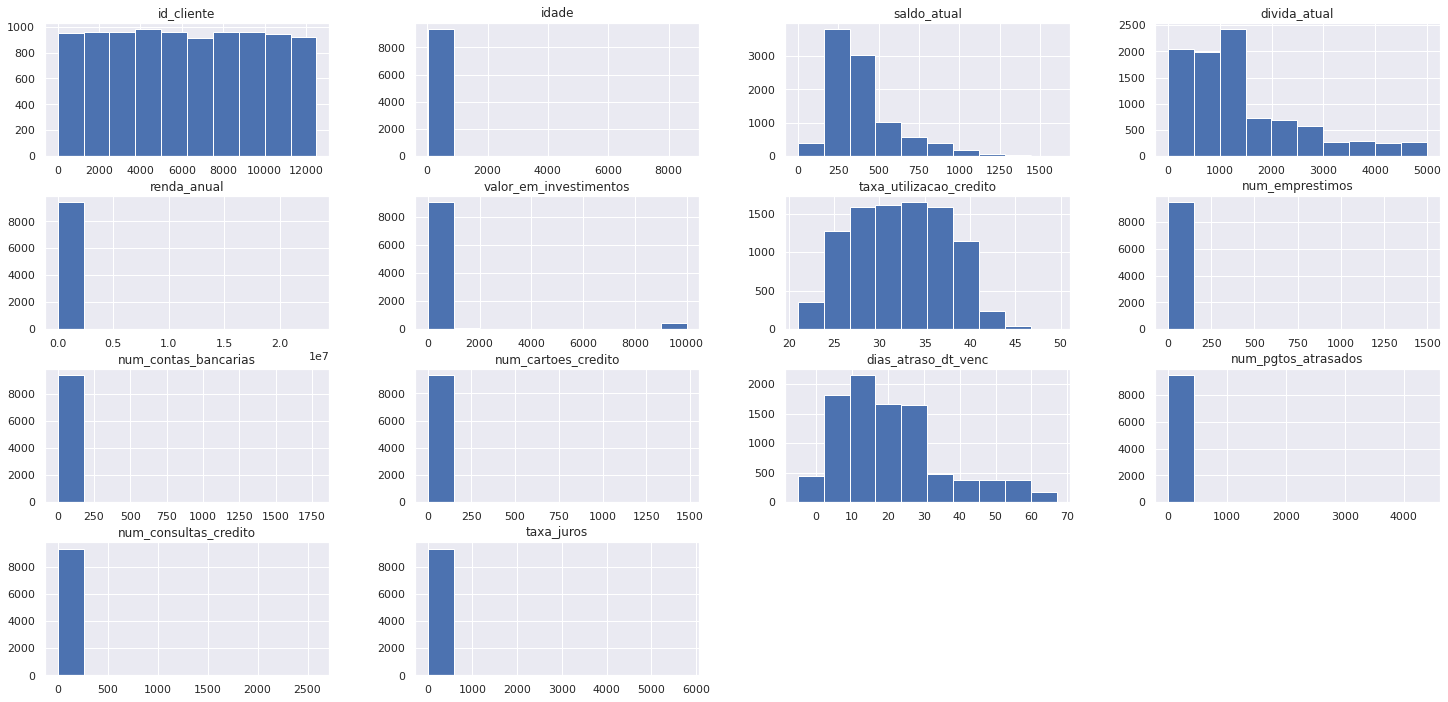

In [80]:
plt.rcParams['figure.figsize'] = [25, 12]
df.hist()


In [86]:
df[['id_cliente','limite_adicional']].groupby('limite_adicional').count().reset_index()

,limite_adicional,id_cliente
0,Conceder,1505
1,Negar,7995


In [88]:
df.loc[:,'limite_adicional'].value_counts(normalize=True)

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

# Feature Selection

In [91]:
df1 = df.copy()

In [92]:

features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

x = df1.loc[:, features]
y = df1.loc[:, 'limite_adicional']

# Treinamento ML

In [93]:
df2 = df1.copy()

In [94]:
knn_classifier = KNeighborsClassifier (n_neighbors =7)


In [95]:
# training the model
knn_classifier.fit(x,y)

# make predictions
y_pred = knn_classifier.predict(x)


In [96]:
# concat predictions to original dataset 
df2['predictions'] = y_pred.tolist()
df_results = df2.loc[:,['id_cliente', 'idade', 'limite_adicional','predictions']]


# Acuracia


In [98]:
 mt.confusion_matrix(y,y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

Linhas indicam os labels reais e as colunas os labels preditos. TP = 369, TN = 7792. 

`Acuracia = TP + TN / TP+FP+FN+TN`

In [99]:
mt.accuracy_score(y,y_pred)

0.8590526315789474

# Precision

In [102]:
y.values

array(['Negar', 'Negar', 'Negar', ..., 'Negar', 'Negar', 'Negar'],
      dtype=object)

In [103]:
y_pred

array(['Negar', 'Negar', 'Negar', ..., 'Negar', 'Negar', 'Negar'],
      dtype=object)

In [105]:
mt.precision_score(y.values,y_pred, pos_label='Conceder')

0.6451048951048951

Precisao diz quantos rotulos TP dentre todas as previsoes POSITIVE do modelo. Nesse caso, acertou 64% de todas as POSITIVE dadas pelo modelo

# Recall 


In [106]:
mt.recall_score(y.values,y_pred,pos_label='Conceder')

0.24518272425249169

Recall diz o quanto acertou das labels positivas dentre todas as classes positivas. Nesse caso, 24,5%. 